## Importing Essential Libraries

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Loading the rice dataset from uci repo

In [283]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 

X = yeast.data.features.to_numpy() 
y_raw = yeast.data.targets.to_numpy()

## Converting y to a 1D array

In [284]:
print(X.shape)
print(y_raw[:2])

(1484, 8)
[['MIT']
 ['MIT']]


In [285]:
y = y_raw.ravel()
print(y[:3])

['MIT' 'MIT' 'MIT']


## Splitting the dataset into the Training and Test sets

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Scaling
we scale the features so they're in the same range

In [287]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [288]:
print(f"X and y shapes: {X.shape}, {y.shape}")

X and y shapes: (1484, 8), (1484,)


## Training the K-NN model on the Training set

In [289]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
#classifier = KNeighborsClassifier(n_neighbors=5, weights="distance")
#classifier = KNeighborsClassifier(n_neighbors=30, p=2, algorithm="auto", leaf_size=10, weights="distance") #{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Insample Prediction: on training data

In [290]:
y_pred_ins = classifier.predict(X_train)
#print(np.concatenate((y_pred_ins.reshape(len(y_pred_ins),1), y_train.reshape(len(y_train),1)),1))

### Let's see the confusion matrix and accuracy score

In [291]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_ins)
#print(cm)
accuracy_score(y_train, y_pred_ins)

0.7287278854254423

## Outsample Prediction: on test data and confusion matrix

In [292]:
y_pred_out = classifier.predict(X_test)

In [293]:
cm = confusion_matrix(y_test, y_pred_out)
#print(cm)
accuracy_score(y_test, y_pred_out)

0.5353535353535354

## Hyperparameter tuning with Gridsearch

In [294]:
from sklearn.model_selection import GridSearchCV
import sys
import os
sys.path.append(os.path.abspath('../Assignment 1'))
from knn_helper import run_grid_search

best_params, best_score = run_grid_search(X_train, y_train)
# Print the best parameters and the best score
print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: {:.2f}".format(best_score))

Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.61


C:\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.4937028  0.4937028  0.49704287 ... 0.60993157 0.58128568 0.59896465]
  warnings.warn(


# Learning Curve
## Experiment to run with different values of k and observe the accuracy.

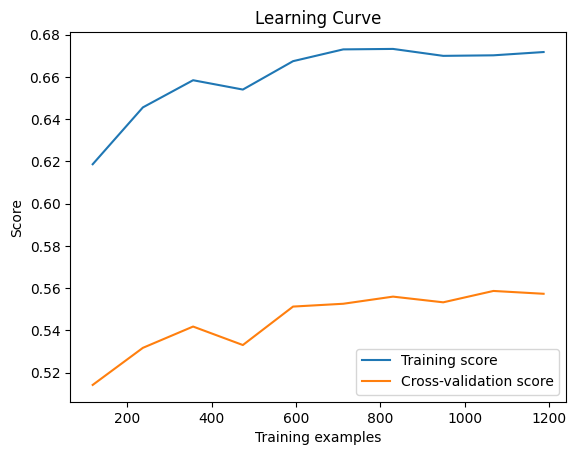

In [295]:
from sklearn.model_selection import learning_curve

model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=0, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [296]:
# print(train_sizes)
# print(train_scores)
# print("Test scores \n", test_scores)


## Experimenting with different values of k

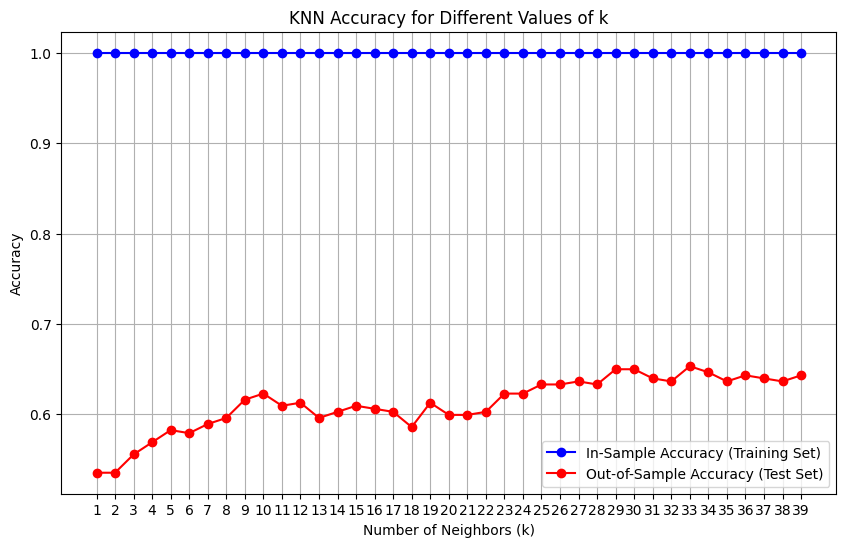

In [297]:
k_vals = [i for i in range(1,40)]
train_accuracies = []
test_accuracies = []
for k in k_vals:
    #classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier = KNeighborsClassifier(n_neighbors=k, p=1, algorithm="auto", leaf_size=10, weights="distance")
    classifier.fit(X_train, y_train)

    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))


# now let's plot it - Accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_vals, train_accuracies, label='In-Sample Accuracy (Training Set)', marker='o', color='b')
plt.plot(k_vals, test_accuracies, label='Out-of-Sample Accuracy (Test Set)', marker='o', color='r')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.show()

In [298]:
#print(train_accuracies)
#print(test_accuracies)